# **Imports & Instantiation**

In [39]:
# core components import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# utilities import
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# models import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# utilities instantiation
le = LabelEncoder()
scaler = StandardScaler()

# models instantiation
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()


#**Function Declarations**

In [40]:
def MapGrade(mark):
    if 10 <= mark <= 20:
        return 'yes'
    elif 0 <= mark <= 9:
        return 'no'
    else:
        return 'invalid'

# **Reading the CSV**

In [41]:
math_df = pd.read_csv('./student-mat.csv', sep=';')

In [42]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# **Data Processing 1**

In [43]:
math_df.drop(['G1', 'G2'], axis=1, inplace=True)

In [44]:
math_df['G3'] = math_df['G3'].apply(MapGrade)

In [45]:
math_df.rename(columns={'G3': 'passed'}, inplace=True)

In [46]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


# **Copying the original DataFrame for visualization purpose**

In [47]:
math_df_visualize = math_df.copy()

# **Data Processing 2**

In [48]:
math_df['passed'] = le.fit_transform(math_df['passed'])
math_df_visualize['passed'] = le.fit_transform(math_df['passed'])

In [49]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,1


# **Analysis on Mothers' Job and Romantic**

<Figure size 640x480 with 0 Axes>

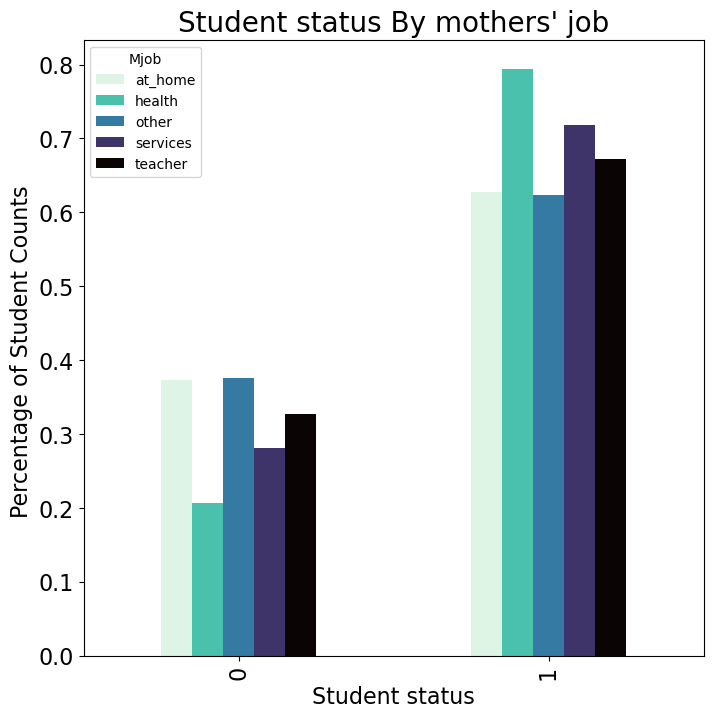

In [50]:
# mothers' job effect on students performance

mjob_tab = pd.crosstab(index=math_df_visualize.passed, columns=math_df_visualize.Mjob)
mjob_perc = mjob_tab.apply(lambda col: col/col.sum())
plt.figure()
mjob_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(8,8))
plt.title('Student status By mothers\' job', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.show()

<Figure size 640x480 with 0 Axes>

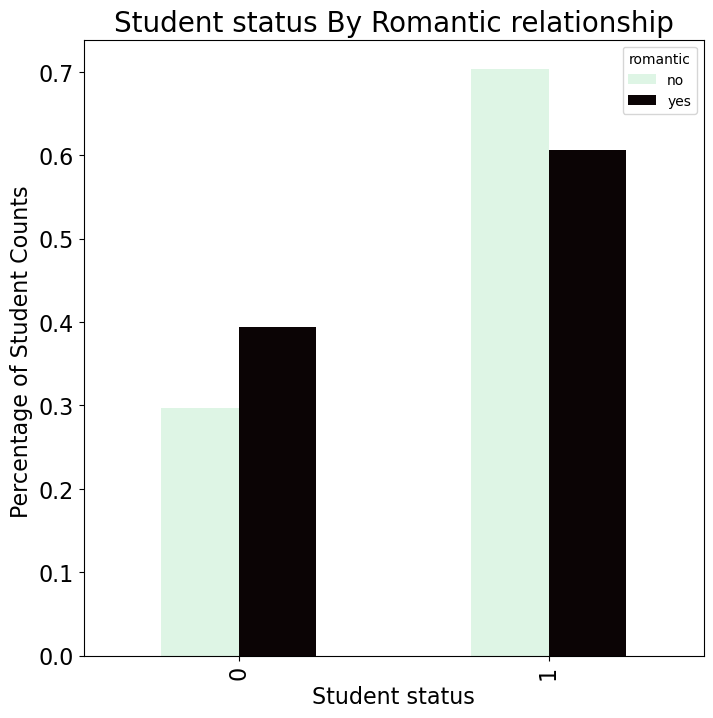

In [51]:
# effect of ramance

romance_tab = pd.crosstab(index=math_df_visualize.passed, columns=math_df_visualize.romantic)
romance_perc = romance_tab.apply(lambda col: col/col.sum())
plt.figure()
romance_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(8,8))
plt.title('Student status By Romantic relationship', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.show()

# **Data Processing 3**

In [52]:
# finding the columns those contain categorical value

categorical_columns = []
for column in math_df.columns:
    if math_df[column].dtype == 'object':
        categorical_columns.append(column)

print("Categorical columns:", categorical_columns)
print("length:", len(categorical_columns))

Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
length: 17


In [53]:
binary_category = []
non_binary_category = []

for each in categorical_columns:
    print(each, len(math_df[each].unique()),'labels')

    if len(math_df[each].unique()) == 2:
        binary_category.append(each)
    else:
        non_binary_category.append(each)

school 2 labels
sex 2 labels
address 2 labels
famsize 2 labels
Pstatus 2 labels
Mjob 5 labels
Fjob 5 labels
reason 4 labels
guardian 3 labels
schoolsup 2 labels
famsup 2 labels
paid 2 labels
activities 2 labels
nursery 2 labels
higher 2 labels
internet 2 labels
romantic 2 labels


In [54]:
# applying label encoding on the binary category

math_df[binary_category] = math_df[binary_category].apply(le.fit_transform)

# **Data Processing 4**

In [55]:
for each in non_binary_category:
    print(each, math_df[each].value_counts().to_dict())

# no two has the same frequency
# good to go for applying frequency encoding

Mjob {'other': 141, 'services': 103, 'at_home': 59, 'teacher': 58, 'health': 34}
Fjob {'other': 217, 'services': 111, 'teacher': 29, 'at_home': 20, 'health': 18}
reason {'course': 145, 'home': 109, 'reputation': 105, 'other': 36}
guardian {'mother': 273, 'father': 90, 'other': 32}


In [56]:
math_df['Fjob'] = math_df['Fjob'].map(math_df['Fjob'].value_counts())
math_df['Mjob'] = math_df['Mjob'].map(math_df['Mjob'].value_counts())
math_df['reason'] = math_df['reason'].map(math_df['reason'].value_counts())
math_df['guardian'] = math_df['guardian'].map(math_df['guardian'].value_counts())

In [57]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,18,1,0,0,4,4,59,29,...,0,0,4,3,4,1,1,3,6,0
1,0,0,17,1,0,1,1,1,59,217,...,1,0,5,3,3,1,1,3,4,0
2,0,0,15,1,1,1,1,1,59,217,...,1,0,4,3,2,2,3,3,10,1
3,0,0,15,1,0,1,4,2,34,111,...,1,1,3,2,2,1,1,5,2,1
4,0,0,16,1,0,1,3,3,141,217,...,0,0,4,3,2,1,2,5,4,1


# **Data Processing 5**

In [58]:
columns_to_scale = math_df.drop(columns=['passed']).columns

In [59]:
math_df[columns_to_scale] = scaler.fit_transform(math_df[columns_to_scale])

In [60]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,-0.36305,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,-0.999033,-1.675428,...,-2.232677,-0.708450,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,0
1,-0.36305,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-0.999033,0.837037,...,0.447893,-0.708450,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,0
2,-0.36305,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-0.999033,0.837037,...,0.447893,-0.708450,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,1
3,-0.36305,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-1.648674,-0.579565,...,0.447893,1.411533,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1
4,-0.36305,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,1.131790,0.837037,...,-2.232677,-0.708450,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,1


# **Train Test Split**

In [61]:
data = math_df.to_numpy()
n = data.shape[1]
x = data[:, 0:n-1]
y = data[:, n-1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)

# **Training Model 1 -> KNN**

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
print(f"KNN train accuracy in percentage: {round(knn.score(X_train, y_train)*100, 2)}%")
print(f"KNN test accuracy in percentage: {round(knn.score(X_test, y_test)*100, 2)}%")

KNN train accuracy in percentage: 78.16%
KNN test accuracy in percentage: 70.89%


In [64]:
y_pred = knn.predict(X_test)
y_pred

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.])

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.32      0.38        22
         1.0       0.77      0.86      0.81        57

    accuracy                           0.71        79
   macro avg       0.62      0.59      0.59        79
weighted avg       0.68      0.71      0.69        79



<Axes: >

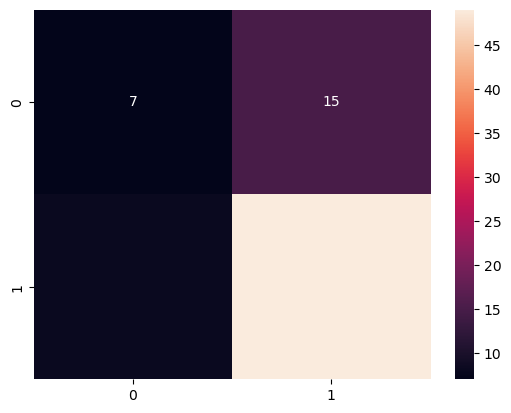

In [66]:
knn_cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cf_matrix, annot=True)

# **Training Model 2 -> DTC**

In [67]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
print(f"DTC train accuracy in percentage: {round(dtc.score(X_train, y_train)*100, 2)}%")
print(f"DTC test accuracy in percentage: {round(dtc.score(X_test, y_test)*100, 2)}%")

DTC train accuracy in percentage: 100.0%
DTC test accuracy in percentage: 63.29%


In [69]:
y_pred = dtc.predict(X_test)
y_pred

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.])

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.38      0.50      0.43        22
         1.0       0.78      0.68      0.73        57

    accuracy                           0.63        79
   macro avg       0.58      0.59      0.58        79
weighted avg       0.67      0.63      0.65        79



<Axes: >

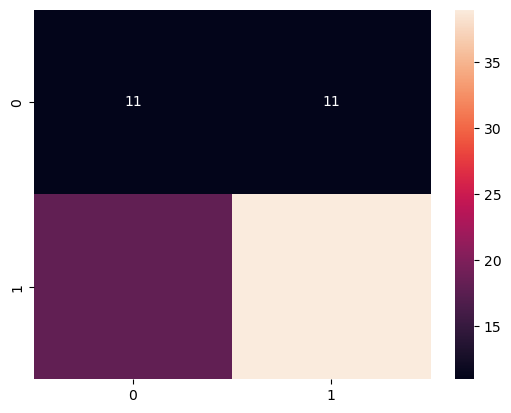

In [71]:
dtc_cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(dtc_cf_matrix, annot=True)

# **Training Model 3 -> SVC**

In [72]:
svc.fit(X_train, y_train)

SVC()

In [73]:
print(f"SVC train accuracy in percentage: {round(svc.score(X_train, y_train)*100, 2)}%")
print(f"SVC test accuracy in percentage: {round(svc.score(X_test, y_test)*100, 2)}%")


SVC train accuracy in percentage: 87.03%
SVC test accuracy in percentage: 72.15%


In [74]:
y_pred = svc.predict(X_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.14      0.21        22
         1.0       0.74      0.95      0.83        57

    accuracy                           0.72        79
   macro avg       0.62      0.54      0.52        79
weighted avg       0.67      0.72      0.66        79



<Axes: >

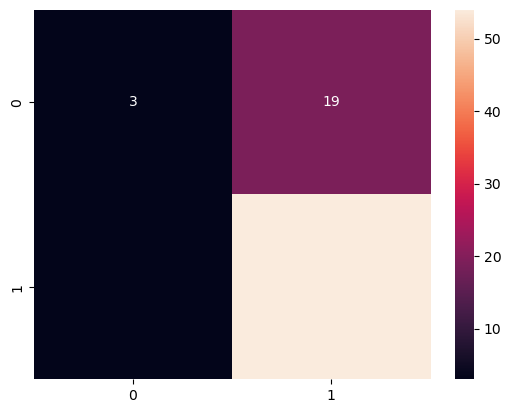

In [76]:
svc_cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cf_matrix, annot=True)